In [158]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [159]:
kendell=os.listdir("C:/image processing/ashok/")
priya=os.listdir("C:/image processing/priya/")
jimin=os.listdir("C:/image processing/jimin")

In [160]:
limit=10
kendell_images = [None]*limit
priya_images = [None]*limit
jimin_images = [None]*limit
j=0
for i in kendell:
    if (j<limit):
        kendell_images[j]= imread("C:/image processing/ashok/"+i)
        j+=1
    else:
        break

j=0
for i in priya:
    if(j<limit):
        priya_images[j]=imread("C:/image processing/priya/"+i)
        j+=1
    else:
        break

j=0
for i in jimin:
    if(j<limit):
        jimin_images[j]=imread("C:/image processing/jimin/"+i)
        j+=1
    else:
        break

In [161]:
kendell_gray=[None]*limit
priya_gray=[None]*limit
jimin_gray=[None]*limit
j=0

for i in kendell:
    if(j<limit):
        kendell_gray[j]=rgb2gray(kendell_images[j])
        j+=1
    else:
        break
j=0
for i in priya:
    if(j<limit):
        priya_gray[j]=rgb2gray(priya_images[j])
        j+=1
    else:
        break
    

j=0
for i in jimin:
    if(j<limit):
        jimin_gray[j]=rgb2gray(jimin_images[j])
        j+=1
    else:
        break

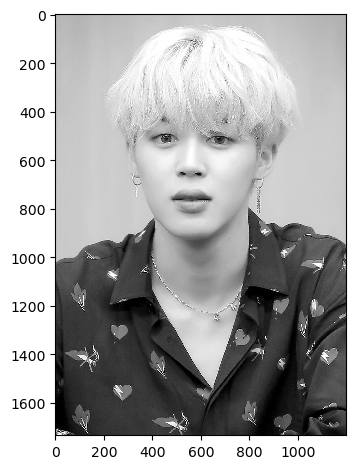

In [162]:
imshow(jimin_gray[0])

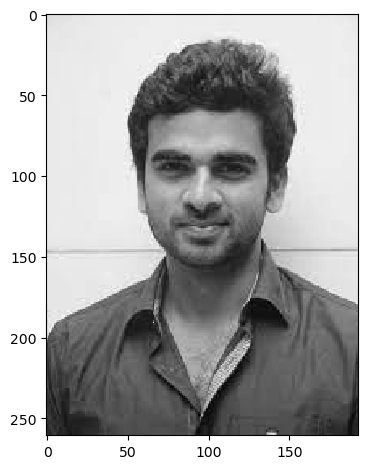

In [163]:
imshow(kendell_gray[0])

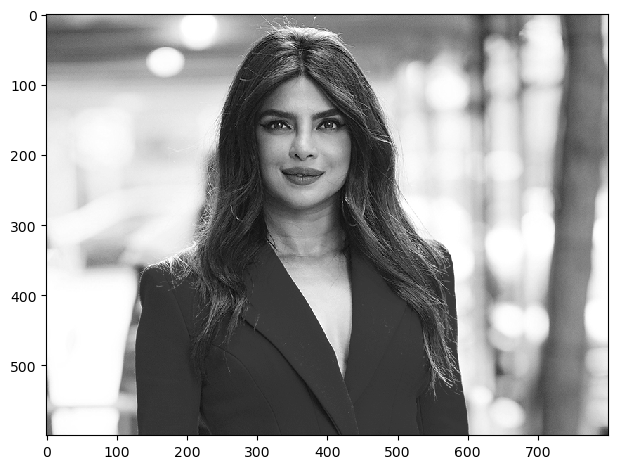

In [164]:
imshow(priya_gray[0])

In [165]:
jimin_gray[2].shape

(1594, 736)

In [166]:
for j in range(10):
    jimin_temp=jimin_gray[j]
    jimin_gray[j]=resize(jimin_temp,(512,512))

In [167]:
for j in range(10):
    kendell_temp=kendell_gray[j]
    kendell_gray[j]=resize(kendell_temp,(512,512))
for j in range(10):
    priya_temp=priya_gray[j]
    priya_gray[j]=resize(priya_temp,(512,512))



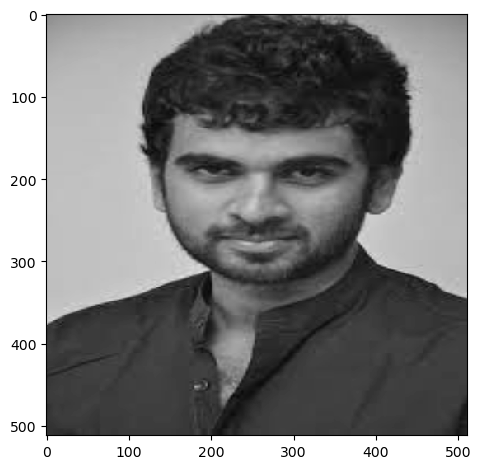

In [168]:
imshow(kendell_gray[2])

In [169]:
len_of_jimin=len(jimin_gray)
len_of_kendell=len(kendell_gray)
len_of_priya=len(priya_gray)


In [170]:
image_size_jimin=jimin_gray[1].shape
image_size_kendell=kendell_gray[1].shape
image_size_priya=priya_gray[1].shape

In [171]:
image_size_jimin

(512, 512)

In [172]:
flatten_size_jimin=image_size_jimin[0]*image_size_jimin[1]
flatten_size_kendell=image_size_kendell[0]*image_size_kendell[1]
flatten_size_priya=image_size_priya[0]*image_size_priya[1]

In [173]:
flatten_size_jimin

262144

In [174]:
for i in range(len_of_jimin):
    jimin_gray[i]= np.ndarray.flatten(jimin_gray[i].reshape(flatten_size_jimin,1))
for i in range(len_of_kendell):
    kendell_gray[i]= np.ndarray.flatten(kendell_gray[i].reshape(flatten_size_kendell,1))
for i in range(len_of_priya):
    priya_gray[i]= np.ndarray.flatten(priya_gray[i].reshape(flatten_size_priya,1))

In [175]:
jimin_gray=np.dstack(jimin_gray)
kendell_gray=np.dstack(kendell_gray)
priya_gray=np.dstack(priya_gray)

In [176]:
priya_gray.shape

(1, 262144, 10)

In [177]:
jimin_gray=np.rollaxis(jimin_gray,axis=2,start=0)
kendell_gray=np.rollaxis(kendell_gray,axis=2,start=0)
priya_gray=np.rollaxis(priya_gray,axis=2,start=0)
priya_gray.shape



(10, 1, 262144)

In [178]:
kendell_gray=np.rollaxis(kendell_gray,axis=2,start=1)
jimin_gray=np.rollaxis(jimin_gray,axis=2,start=1)
priya_gray=np.rollaxis(priya_gray,axis=2,start=1)

In [179]:
priya_gray.shape

(10, 262144, 1)

In [180]:
jimin_gray=jimin_gray.reshape(len_of_jimin,flatten_size_jimin)
kendell_gray=kendell_gray.reshape(len_of_kendell,flatten_size_kendell)
priya_gray=priya_gray.reshape(len_of_priya,flatten_size_priya)

In [181]:
kendell_gray.shape

(10, 262144)

In [182]:
jimin_data=pd.DataFrame(jimin_gray)
priya_data=pd.DataFrame(priya_gray)
kendell_data=pd.DataFrame(kendell_gray)


In [183]:
kendell_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,0.864450,...,0.110209,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165
1,0.682184,0.682112,0.682654,0.683422,0.684718,0.685798,0.685798,0.685860,0.687698,0.689536,...,0.532713,0.503546,0.474378,0.416129,0.356876,0.361090,0.377997,0.393254,0.407803,0.405863
2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.109988,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025
3,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.501746,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861
4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.368343,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074
5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.310047,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699
6,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.814780,0.816266,0.817361,...,0.193646,0.192257,0.190771,0.187840,0.171599,0.155357,0.146399,0.146031,0.145664,0.145899
7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103269,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470
8,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,0.698456,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953
9,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,0.109089,...,0.059182,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805


In [184]:
jimin_data["label"]="jimin"
kendell_data["label"]="kendell"
priya_data["label"]="priya"


In [185]:
priya_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.536652,0.567462,0.544082,0.559017,0.583616,0.602243,0.578947,0.586940,0.592106,0.591887,...,0.562604,0.487644,0.419400,0.376022,0.325338,0.265677,0.257426,0.226618,0.212304,priya
1,0.056991,0.056991,0.056991,0.056991,0.056991,0.056991,0.058447,0.060913,0.060913,0.060913,...,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,priya
2,0.819332,0.816885,0.809103,0.814513,0.819853,0.816749,0.818630,0.816206,0.815531,0.813710,...,0.724942,0.755740,0.731958,0.728353,0.747810,0.754938,0.753899,0.779147,0.780075,priya
3,0.748876,0.748877,0.749935,0.747318,0.745604,0.750658,0.749125,0.749118,0.749118,0.749117,...,0.819050,0.809133,0.794861,0.800183,0.805825,0.804071,0.787833,0.791709,0.802581,priya
4,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,0.262655,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,priya
6,0.103941,0.065267,0.049374,0.048467,0.042988,0.046109,0.046191,0.046783,0.047338,0.052439,...,0.269702,0.212256,0.197379,0.202744,0.202706,0.202724,0.191692,0.173590,0.162868,priya
7,0.784857,0.780966,0.771628,0.757636,0.748369,0.743138,0.745403,0.742638,0.739632,0.741308,...,0.518839,0.512516,0.503644,0.490498,0.484184,0.479159,0.471411,0.469361,0.469274,priya
8,0.892661,0.892356,0.894976,0.897254,0.894647,0.896065,0.898074,0.900086,0.902174,0.902176,...,0.267230,0.379912,0.526808,0.642102,0.722041,0.777024,0.816876,0.837175,0.841581,priya
9,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.584017,0.584713,0.559944,0.550858,0.542053,0.525660,0.506621,0.513051,0.517931,priya


In [186]:
img_1=pd.concat([jimin_data,kendell_data])

In [187]:
img=pd.concat([img_1,priya_data])

In [188]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.696178,0.703070,0.706655,0.709055,0.710296,0.713658,0.714488,0.714671,0.710268,0.705956,...,0.076169,0.088942,0.097848,0.105942,0.112594,0.114055,0.118562,0.120015,0.128348,jimin
1,0.802843,0.802843,0.802843,0.802843,0.802843,0.802843,0.810686,0.809166,0.806765,0.806765,...,0.147053,0.142286,0.139563,0.141749,0.144683,0.138219,0.136395,0.149985,0.149985,jimin
2,0.132404,0.132404,0.132404,0.132404,0.132404,0.132538,0.132733,0.131630,0.128811,0.128811,...,0.079063,0.078079,0.077547,0.075163,0.074111,0.074111,0.076459,0.076702,0.076702,jimin
3,0.351741,0.354975,0.358812,0.359327,0.359327,0.359327,0.358973,0.357059,0.361188,0.370087,...,0.224542,0.224520,0.221676,0.223394,0.228968,0.231755,0.235349,0.231594,0.229341,jimin
4,0.357344,0.352874,0.352687,0.331959,0.291663,0.282637,0.281056,0.269694,0.262085,0.264405,...,0.920162,0.922192,0.923136,0.925256,0.925280,0.934092,0.935446,0.937955,0.937955,jimin
5,0.926714,0.931072,0.928192,0.924878,0.927947,0.925930,0.918037,0.917254,0.913672,0.910958,...,0.781422,0.781479,0.780427,0.779985,0.776375,0.777204,0.777084,0.772216,0.770419,jimin
6,0.138794,0.144105,0.138560,0.125132,0.125203,0.135702,0.133326,0.131031,0.128532,0.119589,...,0.132505,0.103928,0.105002,0.115462,0.096969,0.115113,0.104494,0.099485,0.092650,jimin
7,0.952941,0.952941,0.952961,0.957808,0.960784,0.960784,0.962267,0.970535,0.970031,0.966792,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,jimin
8,0.005592,0.005592,0.005592,0.005592,0.005585,0.006884,0.012154,0.005260,0.003393,0.009672,...,0.000164,0.000166,0.000177,0.000186,0.004043,0.004073,0.007038,0.007738,0.000186,jimin
9,0.696530,0.686869,0.670931,0.658342,0.655115,0.646074,0.627098,0.610026,0.591206,0.567532,...,0.136344,0.232053,0.250150,0.229299,0.399741,0.326354,0.386733,0.310249,0.224619,jimin


In [189]:
from sklearn.utils import shuffle

In [190]:
img_shuffle = shuffle(img).reset_index()

In [191]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,8,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953,kendell
1,7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,kendell
2,6,0.103941,0.065267,0.049374,0.048467,0.042988,0.046109,0.046191,0.046783,0.047338,...,0.269702,0.212256,0.197379,0.202744,0.202706,0.202724,0.191692,0.173590,0.162868,priya
3,0,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,...,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165,kendell
4,7,0.784857,0.780966,0.771628,0.757636,0.748369,0.743138,0.745403,0.742638,0.739632,...,0.518839,0.512516,0.503644,0.490498,0.484184,0.479159,0.471411,0.469361,0.469274,priya
5,5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,kendell
6,5,0.926714,0.931072,0.928192,0.924878,0.927947,0.925930,0.918037,0.917254,0.913672,...,0.781422,0.781479,0.780427,0.779985,0.776375,0.777204,0.777084,0.772216,0.770419,jimin
7,4,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
8,0,0.696178,0.703070,0.706655,0.709055,0.710296,0.713658,0.714488,0.714671,0.710268,...,0.076169,0.088942,0.097848,0.105942,0.112594,0.114055,0.118562,0.120015,0.128348,jimin
9,1,0.802843,0.802843,0.802843,0.802843,0.802843,0.802843,0.810686,0.809166,0.806765,...,0.147053,0.142286,0.139563,0.141749,0.144683,0.138219,0.136395,0.149985,0.149985,jimin


In [192]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [193]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,0.698456,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953,kendell
1,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,kendell
2,0.103941,0.065267,0.049374,0.048467,0.042988,0.046109,0.046191,0.046783,0.047338,0.052439,...,0.269702,0.212256,0.197379,0.202744,0.202706,0.202724,0.191692,0.173590,0.162868,priya
3,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,0.864450,...,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165,kendell
4,0.784857,0.780966,0.771628,0.757636,0.748369,0.743138,0.745403,0.742638,0.739632,0.741308,...,0.518839,0.512516,0.503644,0.490498,0.484184,0.479159,0.471411,0.469361,0.469274,priya
5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,kendell
6,0.926714,0.931072,0.928192,0.924878,0.927947,0.925930,0.918037,0.917254,0.913672,0.910958,...,0.781422,0.781479,0.780427,0.779985,0.776375,0.777204,0.777084,0.772216,0.770419,jimin
7,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,0.262655,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
8,0.696178,0.703070,0.706655,0.709055,0.710296,0.713658,0.714488,0.714671,0.710268,0.705956,...,0.076169,0.088942,0.097848,0.105942,0.112594,0.114055,0.118562,0.120015,0.128348,jimin
9,0.802843,0.802843,0.802843,0.802843,0.802843,0.802843,0.810686,0.809166,0.806765,0.806765,...,0.147053,0.142286,0.139563,0.141749,0.144683,0.138219,0.136395,0.149985,0.149985,jimin


In [194]:
img_shuffle.shape

(30, 262145)

In [195]:
x = img_shuffle.values[:,:-1]

In [196]:
y= img_shuffle.values[:,-1]

In [197]:
x

array([[0.6949439215686276, 0.6949439215686275, 0.6949439215686276, ...,
        0.7766691973039217, 0.7780708517156864, 0.7769525919117648],
       [0.3628702471205768, 0.36265025128532863, 0.3630342791029987, ...,
        0.1126810009167241, 0.11686958339317172, 0.11447009393430223],
       [0.10394096717364708, 0.06526650610803647, 0.04937430194364231,
        ..., 0.19169194976212023, 0.17359017232486013,
        0.16286760946794349],
       ...,
       [0.6821840730315563, 0.6821117882582719, 0.6826539240579044, ...,
        0.39325376838235293, 0.4078028492647059, 0.4058629718137256],
       [0.19540040615904564, 0.1954108296233532, 0.19533265364104624,
        ..., 0.20957718137254902, 0.20668894607843136,
        0.2070740441176471],
       [0.5366515187726519, 0.5674620304335037, 0.5440823994066293, ...,
        0.2574258812552711, 0.22661765675714318, 0.21230413417594463]],
      dtype=object)

In [198]:
y

array(['kendell', 'kendell', 'priya', 'kendell', 'priya', 'kendell',
       'jimin', 'priya', 'jimin', 'jimin', 'priya', 'priya', 'priya',
       'priya', 'jimin', 'jimin', 'jimin', 'jimin', 'kendell', 'jimin',
       'jimin', 'kendell', 'kendell', 'kendell', 'jimin', 'priya',
       'priya', 'kendell', 'kendell', 'priya'], dtype=object)

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [200]:
from sklearn import svm

In [201]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [202]:
y_pred=clf.predict(x_test)

In [203]:
y_pred

array(['jimin', 'kendell', 'jimin', 'kendell', 'kendell', 'jimin',
       'jimin', 'kendell'], dtype=object)

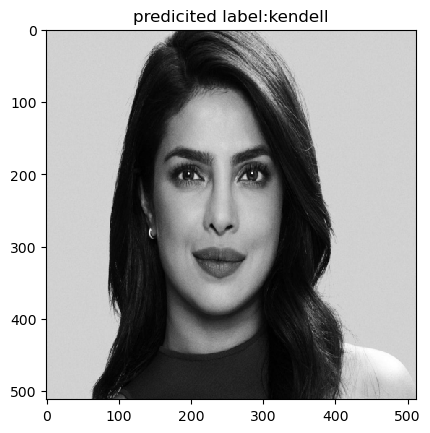

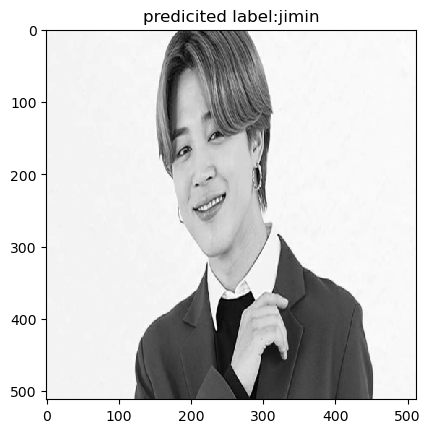

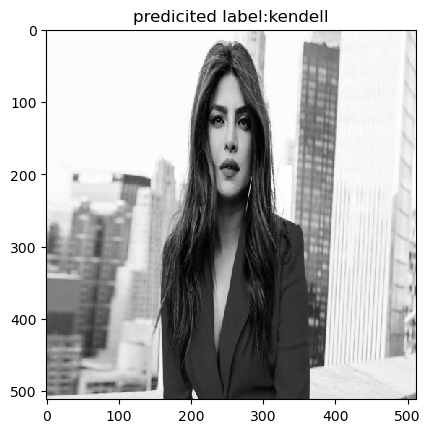

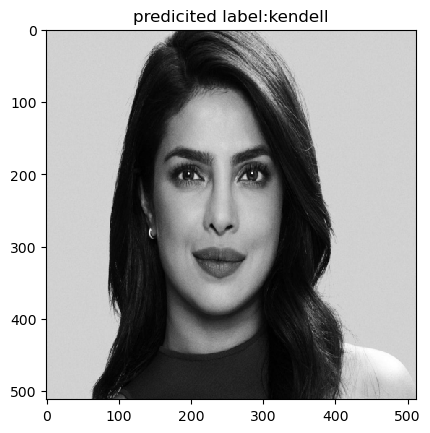

In [204]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [205]:
from sklearn import metrics

In [206]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [207]:
accuracy

0.25

In [208]:
from sklearn.metrics import confusion_matrix

In [209]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [1, 1, 0],
       [2, 3, 0]], dtype=int64)